# Segmentación de Clientes - Análisis Refinado

En este notebook trabajaremos con una base de datos de facturación (invoice data) que contiene información sobre ventas, clientes y transacciones. Nuestro objetivo es realizar una segmentación de clientes basada en sus características, pero con un enfoque depurado para evitar que las categorías queden demasiado amontonadas.

### Columnas principales:
- **invoice_no:** Número de factura
- **customer_id:** Identificador del cliente
- **gender:** Género
- **age:** Edad del cliente
- **category:** Categoría del producto (Clothing, Shoes, Books, etc.)
- **quantity:** Cantidad comprada
- **price:** Precio unitario
- **payment_method:** Método de pago (Credit Card, Debit Card, Cash, etc.)
- **invoice_date:** Fecha de la factura
- **shopping_mall:** Centro comercial donde se realizó la compra

### Objetivos del Taller:

1. Explorar, limpiar y entender la base de datos.
2. Crear variables derivadas (por ejemplo, el valor total de la compra).
3. Reducir la cantidad de categorías (por ejemplo, agrupar aquellas con muy pocos registros) para lograr un análisis más claro.
4. Definir criterios de segmentación demográfica y comportamental.
5. Visualizar los segmentos usando la paleta corporativa.
6. Formular preguntas específicas para discutir implicaciones de marketing.

### Paleta Corporativa a Utilizar:
- Azul: `#0033A0`
- Naranja: `#FF6600`
- Blanco: `#FFFFFF`

¡Sigan cada paso y al final discutan qué implicaciones de marketing se derivan de cada segmento!

In [1]:
!wget https://github.com/javierherrera1996/IntroMarketingAnalytics/raw/refs/heads/main/SegundoCorte/customer_shopping_data.csv.zip

--2025-03-27 01:09:06--  https://github.com/javierherrera1996/IntroMarketingAnalytics/raw/refs/heads/main/SegundoCorte/customer_shopping_data.csv.zip
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/IntroMarketingAnalytics/refs/heads/main/SegundoCorte/customer_shopping_data.csv.zip [following]
--2025-03-27 01:09:07--  https://raw.githubusercontent.com/javierherrera1996/IntroMarketingAnalytics/refs/heads/main/SegundoCorte/customer_shopping_data.csv.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1712272 (1.6M) [application/zip]
Saving to: ‘customer_shopping_data.csv.zip’

cus

In [2]:
!unzip customer_shopping_data.csv.zip

Archive:  customer_shopping_data.csv.zip
  inflating: customer_shopping_data.csv  


In [3]:
# =============================================================================
# IMPORTS Y CONFIGURACIONES INICIALES
# =============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Paleta corporativa
corporate_colors = ['#0033A0', '#FF6600', '#FFFFFF']

# Ajuste de estética con Seaborn
sns.set(style="whitegrid")
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=corporate_colors)

print("Configuración inicial completa. Recuerden usar la paleta corporativa en sus gráficos.")

Configuración inicial completa. Recuerden usar la paleta corporativa en sus gráficos.


## 1. Carga y Vista Rápida del Dataset

Carguen la base de datos denominada `customer_shopping_data.csv`. Observen las dimensiones y las primeras filas para familiarizarse con la estructura de los datos.

In [4]:
# =============================================================================
# 1. CARGA Y VISTA RÁPIDA DEL DATASET
# =============================================================================

df = pd.read_csv('customer_shopping_data.csv')

print("Dimensiones del DataFrame:")
print(df.shape)

print("\nVista rápida de los primeros registros:")
df.head()

Dimensiones del DataFrame:
(99457, 10)

Vista rápida de los primeros registros:


,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


## 2. Análisis Exploratorio Inicial

Revisen la estructura, los tipos de datos y las estadísticas descriptivas del dataset.

**Pregunta para los estudiantes:** ¿Qué columnas consideran críticas para segmentar a los clientes y por qué?

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


# Gender, shopping mall y age sin duda seran columnas criticas para categorizar y clasificar nuestros datos

## 3. Limpieza de Datos

Identifiquen y gestionen valores nulos y duplicados. Es esencial dejar la base limpia para un análisis confiable.

**Pregunta:** ¿Qué variables presentan problemas de calidad de datos y cómo los resolverían?

In [7]:
df.isnull().sum()

,0
invoice_no,0
customer_id,0
gender,0
age,0
category,0
quantity,0
price,0
payment_method,0
invoice_date,0
shopping_mall,0


# Sin datos nulos en el dataset, ninguna columna deberia representar problemas

## 4. Creación de Variables Derivadas

Generen nuevas variables que puedan aportar a la segmentación. Por ejemplo, calculen el **valor total** de la factura (multiplicar `quantity` por `price`).

**Pregunta:** ¿Qué otras variables derivadas podrían ser útiles para analizar el comportamiento de compra?

In [8]:
TotalValue = df['quantity'] * df['price']
df['TotalValue'] = TotalValue
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,TotalValue
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon,7502.00
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul,5401.53
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity,300.08
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM,15004.25
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon,242.40


# Otra variable podría ser el conteo de compras por cliente para determinar la recurrencia del mismo

## 5. Visualización de Distribuciones

Visualicen la distribución de variables clave, como `age` y `total_value`, usando histogramas y boxplots. Usen la paleta corporativa en los gráficos.

**Pregunta:** ¿Detectan patrones o valores atípicos que requieran atención?

<ipython-input-73-50749c4248c1>:5: FutureWarning: 

The `errcolor` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'color': '#FF6600'}` instead.

  sns.barplot(x='age', y='TotalValue', data=df, color="#0033A0" , errcolor="#FF6600")


Text(0.5, 1.0, 'Boxplot de Edad')

<Figure size 1700x600 with 0 Axes>

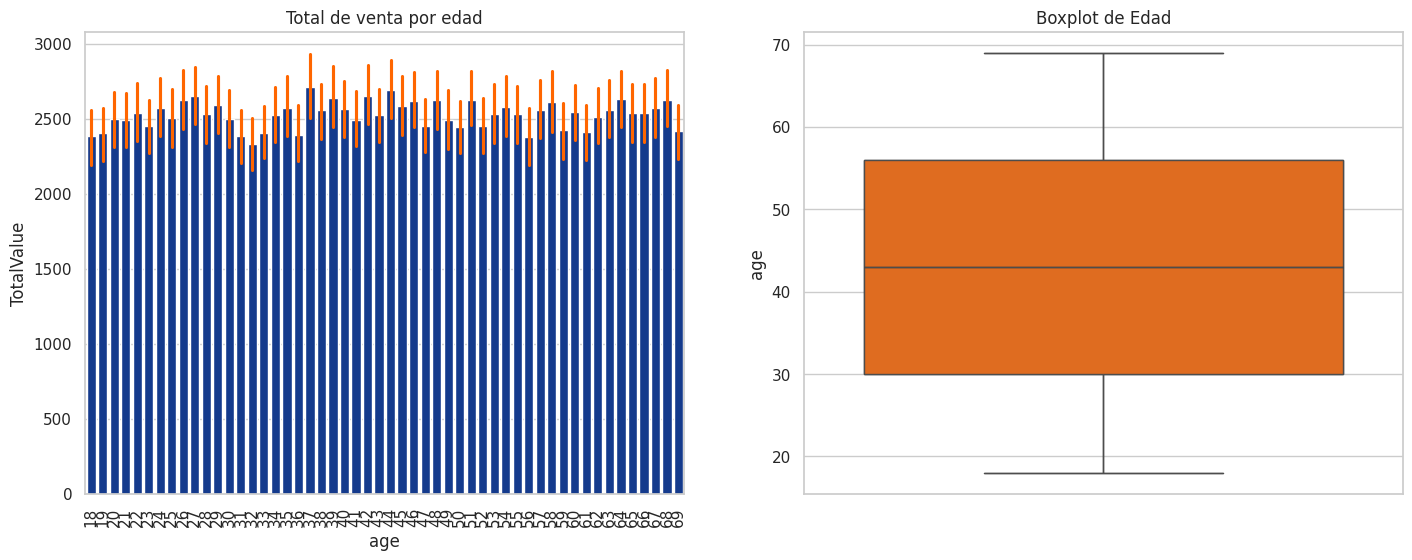

In [73]:
plt.figure(figsize=(17,6))
plt.figure(figsize=(17,6))

plt.subplot(1,2,1)
sns.barplot(x='age', y='TotalValue', data=df, color="#0033A0" , errcolor="#FF6600")
plt.title('Total de venta por edad')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.boxplot(y=df['age'])
plt.title(f'Boxplot de Edad')



plt.subplot(1,2,2)
sns.boxplot(y=df['age'], color="#FF6600")
plt.title(f'Boxplot de Edad')


# No se detectan patrones por edad mantienen un rango promedio ($2500 USD) muy similiar sin importar la edad del cliente

## 6. Definición de Criterios de Segmentación Demográfica

Segmenten a los clientes en función de variables demográficas, por ejemplo, agrupando la edad en categorías (Jóvenes, Adultos, Mayores) y analizando el género.

**Pregunta:** ¿Cómo segmentarían a los clientes en función de la edad y el género para dirigir campañas específicas?

In [21]:
bins_edad = [0, 35, 55, 120]
labels_edad = ['Joven', 'Adulto', 'Mayor']
df['Segmento_Edad'] = pd.cut(df['age'], bins=bins_edad, labels=labels_edad)

In [25]:
df.groupby(['Segmento_Edad', 'gender'])['customer_id'].count()

<ipython-input-25-a83c5b546b30>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['Segmento_Edad', 'gender'])['customer_id'].count()


Segmento_Edad  gender
Joven          Female    20492
               Male      13926
Adulto         Female    23096
               Male      15356
Mayor          Female    15894
               Male      10693
Name: customer_id, dtype: int64

# Agrupando cada cliente con su segmento de edad crearía campañas a fin con las compras más frecuentes por cada grupo de edad asi como su género

## 7. Definición de Criterios de Segmentación Comportamental

Segmenten a los clientes según su comportamiento de compra. Revisen variables como `category`, `payment_method` y `shopping_mall`.

**Pregunta:** ¿Qué comportamiento de compra (categoría, método de pago, centro comercial) consideran de mayor impacto para la estrategia de marketing? ¿Por qué?

In [62]:
df.CategoryGroup = df.groupby(['category'])['TotalValue'].sum().sort_values(ascending=False)
df.MethodGroup = df.groupby(['payment_method'])['TotalValue'].sum().sort_values(ascending=False)
df.MallGroup = df.groupby(['shopping_mall'])['TotalValue'].sum().sort_values(ascending=False)
CategoryGroup = df.CategoryGroup.reset_index()
MethodGroup = df.MethodGroup.reset_index()
MallGroup = df.MallGroup.reset_index()

In [67]:
CategoryGroup

,category,TotalValue
0,Clothing,1.139968e+08
1,Shoes,6.655345e+07
2,Technology,5.786235e+07
3,Cosmetics,6.792863e+06
4,Toys,3.980426e+06
5,Food & Beverage,8.495351e+05
6,Books,8.345529e+05
7,Souvenir,6.358247e+05


In [63]:
MethodGroup

,payment_method,TotalValue
0,Cash,1.128322e+08
1,Credit Card,8.807712e+07
2,Debit Card,5.059643e+07


In [66]:
MallGroup

,shopping_mall,TotalValue
0,Mall of Istanbul,50872481.68
1,Kanyon,50554231.10
2,Metrocity,37302787.33
3,Metropol AVM,25379913.19
4,Istinye Park,24618827.68
5,Zorlu Center,12901053.82
6,Cevahir AVM,12645138.20
7,Viaport Outlet,12521339.72
8,Emaar Square Mall,12406100.29
9,Forum Istanbul,12303921.24


# Se podria impulsar una campaña de ropa en Mall of Instanbul, siendo la categoria y el lugar donde más se perciben ingresos, sin duda ropa es nuestro artículo más fuerte

## 8. Visualizaciones Comparativas de Segmentos

Crucen variables demográficas y comportamentales para identificar relaciones relevantes. Por ejemplo, comparen el grupo de edad con la categoría de producto.

**Pregunta:** ¿Qué relaciones entre estas variables podrían definir segmentos de alto valor?

Tabla cruzada (Edad vs Categoria):
category       Books  Clothing  Cosmetics  Food & Beverage  Shoes  Souvenir  \
Segmento_Edad                                                                 
Joven           1708     11951       5171             5126   3478      1738   
Adulto          1921     13320       5868             5715   3880      1894   
Mayor           1352      9216       4058             3935   2676      1367   

category       Technology  Toys  
Segmento_Edad                    
Joven                1713  3533  
Adulto               1982  3872  
Mayor                1301  2682  


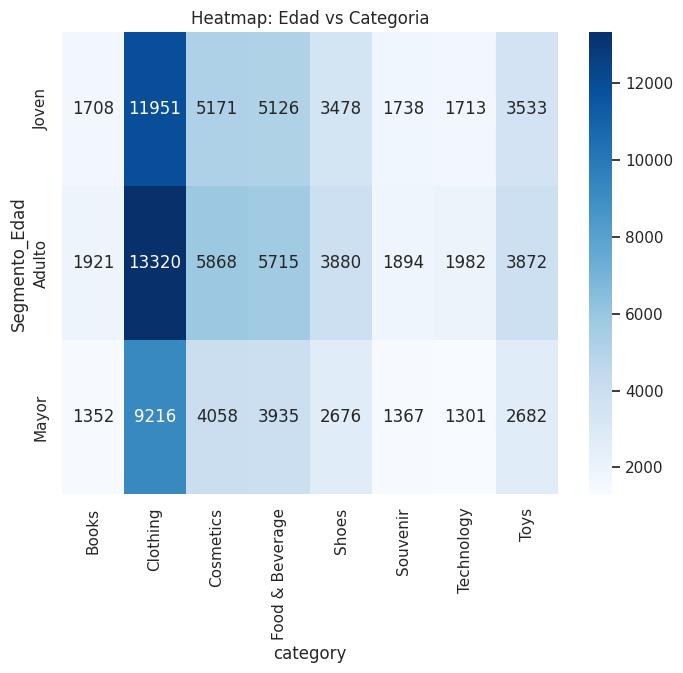

In [74]:
tabla_segmentos = pd.crosstab(df['Segmento_Edad'], df['category'])
print("Tabla cruzada (Edad vs Categoria):")
print(tabla_segmentos)

plt.figure(figsize=(8,6))
sns.heatmap(tabla_segmentos, annot=True, cmap='Blues', fmt='d')
plt.title('Heatmap: Edad vs Categoria')
plt.show()

# Por su fuerte concentración nuestro alto valor esta en **ropa para adulto**

## 9. Reducción y Agrupación de Categorías

Si encuentran que hay demasiadas categorías o que algunas tienen muy pocos registros, agrupen aquellas que sean similares o con bajo volumen para evitar análisis amontonados.

**Ejemplo:** Si hay muchas categorías de tecnología o juguetes con pocos registros, podrían agruparlas en "Otros" o "Tecnología/Entretenimiento".

**Pregunta:** ¿Qué categorías agruparían y por qué?

In [76]:
CategoryGroup

,category,TotalValue
0,Clothing,1.139968e+08
1,Shoes,6.655345e+07
2,Technology,5.786235e+07
3,Cosmetics,6.792863e+06
4,Toys,3.980426e+06
5,Food & Beverage,8.495351e+05
6,Books,8.345529e+05
7,Souvenir,6.358247e+05


# Si bien todas las categorías tienen altos montos, quizá agruparía shoes con clothing, y tecnología con juguetes

In [85]:
df['categorysummary'] = df['category'].replace({
                  'Clothing': 'Clothing',
                  'Shoes': 'Clothing',
                  'Technology': 'Technology',
                  'Toys': 'Technology',
                  'Cosmetics': 'Cosmetics',
                  'Food & Beverage': 'Food & Beverage',
                  'Books': 'Books',
                  'Souvenir': 'Souvenir'

                })

In [87]:
df.groupby(['categorysummary'])['TotalValue'].sum().sort_values(ascending=False)

,TotalValue
categorysummary,
Clothing,1.805502e+08
Technology,6.184278e+07
Cosmetics,6.792863e+06
Food & Beverage,8.495351e+05
Books,8.345529e+05
Souvenir,6.358247e+05


## 10. Creación de Segmentación Manual Combinada

Combinen criterios demográficos (por ejemplo, grupo de edad) y comportamentales (por ejemplo, categoría reducida y shopping mall) para formar un único segmento combinado.

**Pregunta:** ¿Qué combinación de variables creen que ofrece el perfil más completo para orientar estrategias de marketing?

In [102]:
def asignar_segmento(row):
    return f"{row['Segmento_Edad']}_{row['categorysummary']}"

df['Segmento_Comb'] = df.apply(asignar_segmento, axis=1)
seg_counts = df['Segmento_Comb'].value_counts().reset_index()
seg_counts.columns = ['Segmento_Comb', 'Cantidad']
seg_counts

,Segmento_Comb,Cantidad
0,Adulto_Clothing,17200
1,Joven_Clothing,15429
2,Mayor_Clothing,11892
3,Adulto_Cosmetics,5868
4,Adulto_Technology,5854
5,Adulto_Food & Beverage,5715
6,Joven_Technology,5246
7,Joven_Cosmetics,5171
8,Joven_Food & Beverage,5126
9,Mayor_Cosmetics,4058


## 11. Análisis Final de los Grupos Resultantes

Analicen cómo se comportan los segmentos combinados en relación al **valor total de compra**. Identifiquen cuáles tienen un alto valor promedio y discutan sus implicaciones para la estrategia de marketing.

**Pregunta:** ¿Qué segmento destaca por tener un alto valor total y qué estrategias sugerirían para potenciarlo?

Ingreso promedio por Segmento Combinado:
             Segmento_Comb   TotalValue
0             Adulto_Books   164.662598
1          Adulto_Clothing  4082.264587
2         Adulto_Cosmetics   450.294949
3   Adulto_Food & Beverage    57.680997
4          Adulto_Souvenir   123.041135
5        Adulto_Technology  4213.818435
6              Joven_Books   172.521956
7           Joven_Clothing  4037.908780
8          Joven_Cosmetics   450.955649
9    Joven_Food & Beverage    57.501432
10          Joven_Souvenir   131.439442
11        Joven_Technology  3916.752406
12             Mayor_Books   165.361354
13          Mayor_Clothing  4039.219396
14         Mayor_Cosmetics   448.161774
15   Mayor_Food & Beverage    57.213675
16          Mayor_Souvenir   127.536935
17        Mayor_Technology  4174.692443


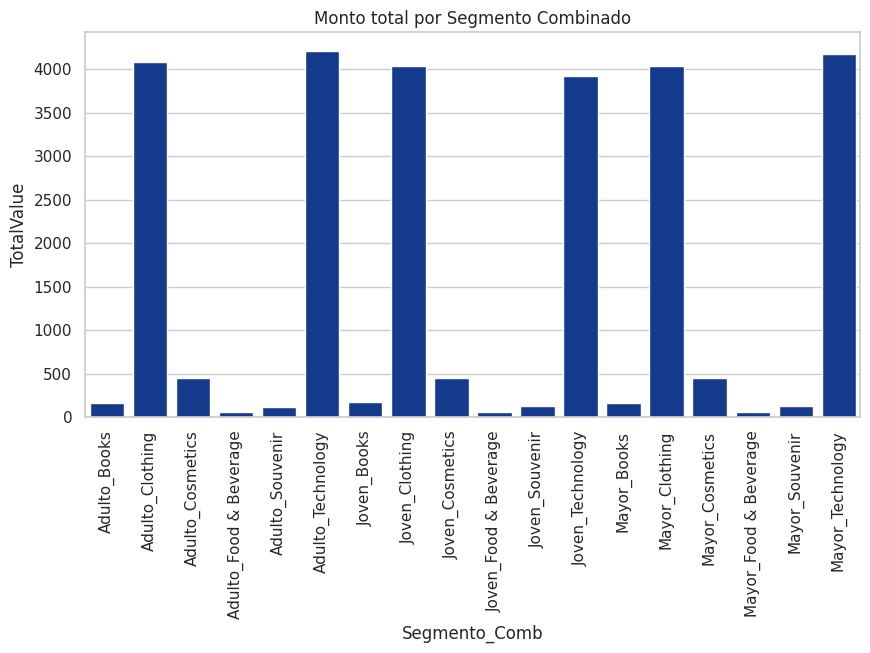

In [104]:
promedio_segmentos = df.groupby('Segmento_Comb')['TotalValue'].mean().reset_index()
promedio_segmentos.columns = ['Segmento_Comb', 'TotalValue']
print("Ingreso promedio por Segmento Combinado:")
print(promedio_segmentos)

plt.figure(figsize=(10,5))
sns.barplot(x='Segmento_Comb', y='TotalValue', data=promedio_segmentos)
plt.title('Monto total por Segmento Combinado')
plt.xticks(rotation=90)
plt.show()

## 12. Recomendaciones de Marketing

Con base en el análisis de los segmentos, respondan las siguientes preguntas:

- ¿Qué segmentos tienen mayor potencial en términos de valor y frecuencia de compra?
- ¿Qué estrategias de marketing implementarían para segmentos con bajo valor promedio?
- ¿Cómo influye la categoría de producto (tras la reducción) y el centro comercial en el comportamiento de compra?

Escriban sus respuestas en una celda Markdown o en un documento complementario, justificando cada estrategia.

#**Respuesta:**
*¿Qué segmentos tienen mayor potencial en términos de valor y frecuencia de compra?*

**Segmentos de Alto Potencial:**

**Ropa para Adultos**: La categoría Ropa para Adultos tiene un Valor Total promedio alto, lo que indica potencial de compras de mayor valor.

**Cosméticos para Adultos**: Si bien no es tan prominente como la categoría Ropa para Adultos, este segmento también podría tener potencial debido a las compras recurrentes y la variedad de productos.

**Ropa para Jóvenes**: Este segmento podría tener potencial basado en las tendencias de moda y el consumo juvenil, a pesar de que los valores de compra individuales podrían ser menores.

*¿Qué estrategias de marketing implementarían para segmentos con bajo valor promedio?*

**Estrategias para Segmentos de Bajo Valor: Enfoque en aumentar la frecuencia y el valor promedio de compra:**

Adultos mayores Libros y adultos mayores Tecnología:
**Programas de fidelización**: Recompensa las compras recurrentes con descuentos o contenido exclusivo.
**Ofertas combinadas**: Fomenta la compra de varios libros o tecnología relacionada con descuentos.
**Recomendaciones personalizadas**: Sugiere libros o tecnología similares según sus compras anteriores o su historial de navegación.

*¿Cómo influye la categoría de producto (tras la reducción) y el centro comercial en el comportamiento de compra?*

**Influencia de la categoría y el centro comercial**: La categoría de Ropa es la de mayor rendimiento en general. Combinando esto con el análisis de centros comerciales:

Promoción de ropa en el Centro Comercial de Estambul: Dado que ambos tienen un rendimiento superior (Centro Comercial de Estambul y Ropa), es optimo centrarse en campañas específicas dentro del Centro Comercial de Estambul que destaquen las prendas de vestir.
Ubicación estratégica de producto: Asegurar una sólida presencia visual de las prendas de vestir dentro del Centro Comercial de Estambul, posiblemente con áreas promocionales específicas.
**Campañas por categoría**: Desarrollar campañas para categorías como Tecnología y Libros en centros comerciales donde puedan tener una mayor cuota de mercado o interés del cliente.
**Integración online y offline**: Aprovechar los canales online para promocionar categorías específicas en centros comerciales objetivo y viceversa.
El éxito de las campañas se puede monitorizar mediante métricas claves como Tasa de conversión y tasa de retención de clientes

## 13. Toma de Decisiones y Conclusiones

Finalmente, el equipo de marketing debe decidir:

- ¿Cuántos segmentos son óptimos para la estrategia de la empresa?
- ¿Cómo asignar el presupuesto de marketing entre estos segmentos?
- ¿Qué indicadores se utilizarán para medir el éxito de las campañas en cada segmento?

**Actividad Final:**

1. Seleccionen el segmento con mayor potencial en términos de valor y frecuencia de compra.
2. Propongan una estrategia específica (campañas, promociones, ofertas personalizadas) para ese segmento.
3. Justifiquen su elección y expliquen cómo monitorizarán el desempeño de la campaña.

¡Discútanlo en grupo y compartan sus conclusiones!

#**Respuesta:**#
La estrategia la enfocaría en 3-4 segmentos principales. Esto permite una gestión más eficiente del presupuesto y la personalización de las campañas sin dispersar demasiado los esfuerzos.

**Alto Valor**: Adultos (Ropa y Cosméticos), que concentran el mayor volumen de compras.

**Potencial Crecimiento**: Jóvenes (Ropa), con alto potencial de fidelización a largo plazo.

**Oportunidad**: Adultos Mayores (Tecnología y Libros), donde se pueden implementar estrategias para aumentar la frecuencia y el valor de compra.

**Otros**: El resto de combinaciones se pueden agrupar para un análisis general y acciones de marketing menos específicas.

*¿Cómo asignar el presupuesto de marketing entre estos segmentos?*

Alto Valor (60%): Mantener la fidelidad y aumentar el gasto promedio con programas de fidelización, ofertas exclusivas, eventos especiales y recomendaciones personalizadas.

Potencial Crecimiento (25%): Captar atención con campañas en redes sociales, influencers, promociones atractivas y contenido relevante para su estilo de vida.

Oportunidad (10%): Implementar estrategias para aumentar la frecuencia y el valor de compra, como ofertas combinadas y descuentos por volumen

Otros (5%): Acciones generales de branding y promociones masivas.

*¿Qué indicadores se utilizarán para medir el éxito de las campañas en cada segmento?*

**Tasa de Conversión**: Porcentaje de clientes del segmento que realizan una compra después de interactuar con la campaña.

**Valor Promedio de Compra**: Gasto promedio por cliente del segmento.

**Frecuencia de Compra**: Número de compras realizadas por cliente del segmento en un período determinado.

**Retorno de la Inversión (ROI)**: Relación entre la inversión en marketing y las ganancias generadas por el segmento.

**Satisfacción del Cliente**: Mediante encuestas y feedback, evaluar la percepción de la marca y las campañas.